In [3]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_vac_src=pd.read_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/vaccine_doses.csv')

In [5]:
df_vac_src.head()

,report_date,previous_day_doses_administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
0,2020-12-24,NaN,"10,756",NaN,NaN
1,2020-12-30,"4,595","18,603",NaN,NaN
2,2020-12-31,"5,463","23,502",NaN,NaN
3,2021-01-01,"5,415","28,887",NaN,NaN
4,2021-01-02,"4,305","33,191",NaN,NaN


In [6]:
df_cases_src=pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')

In [7]:
df_cases_src.head()

,Date,Algoma_Public_Health_Unit,Brant_County_Health_Unit,Chatham-Kent_Health_Unit,Durham_Region_Health_Department,Eastern_Ontario_Health_Unit,Grey_Bruce_Health_Unit,Haldimand-Norfolk_Health_Unit,"Haliburton,_Kawartha,_Pine_Ridge_District_Health_Unit",Halton_Region_Health_Department,...,Simcoe_Muskoka_District_Health_Unit,Southwestern_Public_Health,Sudbury_&_District_Health_Unit,Thunder_Bay_District_Health_Unit,Timiskaming_Health_Unit,Toronto_Public_Health,Wellington-Dufferin-Guelph_Public_Health,Windsor-Essex_County_Health_Unit,York_Region_Public_Health_Services,Total
0,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-03-25,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,17.0,1.0,1.0,5.0,46
2,2020-03-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,21.0,1.0,2.0,5.0,69
3,2020-03-27,0.0,0.0,0.0,5.0,0.0,1.0,0.0,14.0,1.0,...,4.0,2.0,1.0,0.0,0.0,22.0,0.0,0.0,34.0,124
4,2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
df_cases=df_cases_src[['Date', 'Total']]
df_cases.columns=['Date', 'New Cases']
df_cases.head()                  

,Date,New Cases
0,2020-03-24,0
1,2020-03-25,46
2,2020-03-26,69
3,2020-03-27,124
4,2020-03-28,0


In [17]:
df_vac=df_vac_src[['report_date', 'total_individuals_fully_vaccinated']]
df_vac.columns=['Date', 'Fully Vaccinated Total']
df_vac

,Date,Fully Vaccinated Total
0,2020-12-24,NaN
1,2020-12-30,NaN
2,2020-12-31,NaN
3,2021-01-01,NaN
4,2021-01-02,NaN
...,...,...
106,2021-04-14,"337,206"
107,2021-04-15,"339,491"
108,2021-04-16,"341,933"
109,2021-04-17,"344,244"


In [88]:
df_plot=pd.merge(df_vac, df_cases, on='Date')
df_plot['Fully Vaccinated Total']=df_plot['Fully Vaccinated Total'].str.replace(',', '')
df_plot.fillna(0, inplace=True)
df_plot['Fully Vaccinated Total']=df_plot['Fully Vaccinated Total'].astype(int)
df_plot.drop(df_plot[df_plot['Fully Vaccinated Total']==0].index, inplace=True)
df_plot['Date']=pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)
df_plot.head()

,Fully Vaccinated Total,New Cases
Date,,
2021-01-06,430,3266
2021-01-07,1087,3519
2021-01-08,2027,4249
2021-01-09,2940,3443
2021-01-10,2942,3945


Text(0.5, 1.0, 'Vaccinations vs. New cases')

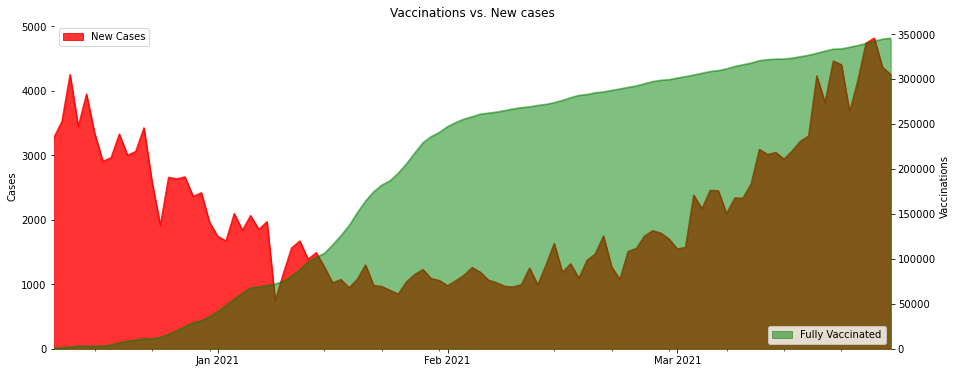

In [109]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
ax2=ax1.twinx()
df_plot.plot(ax=ax1, kind='area', alpha=0.8, y='New Cases', color='red', label='New Cases')
df_plot.plot(ax=ax2, kind='area', alpha=0.5, y='Fully Vaccinated Total', color='green', label='Fully Vaccinated')
ax1.set_xlabel('')
ax1.set_ylabel('Cases')
ax2.set_ylabel('Vaccinations')
ax1.legend(loc=0)
ax2.legend(loc=4)
ax1.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax1.xaxis.set_major_formatter(DateFormatter("%b %Y"))
plt.title('Vaccinations vs. New cases')

In [67]:
fig.savefig('plot.png')